# Imports

In [1]:
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model

## Checking GPU

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Creating the Datasets

Define paramters for the data loaders

In [3]:
batch_size = 16
img_height = 48
img_width = 48
color_mode = 'grayscale'
validation_split = 0.2

dataset = "CK+" # One of "CK+" , "FER_2013"

train_data = "data/"+ dataset + "/train/"
test_data = "data/"+ dataset + "/test/"

print(train_data)
print(test_data)

data/CK+/train/
data/CK+/test/


Load the data into the datasets

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.3, 
                                    validation_split=0.2,
                                    horizontal_flip=True)
# rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest'

train_ds=train_datagen.flow_from_directory(train_data,
                                            batch_size=batch_size,
                                            target_size=(img_height,img_width),
                                            shuffle=True,
                                            color_mode="grayscale",
                                            class_mode='categorical',
                                            subset='training'
                                           )

val_ds=train_datagen.flow_from_directory(train_data,
                                            batch_size=batch_size,
                                            target_size=(img_height,img_width),
                                            shuffle=True,
                                            color_mode="grayscale",
                                            class_mode='categorical',
                                            subset='validation'
                                           )



test_datagen = ImageDataGenerator(rescale=1./255)
test_ds = test_datagen.flow_from_directory(test_data,
                                            batch_size=batch_size,
                                            target_size=(img_height,img_width),
                                            shuffle=False,
                                            color_mode="grayscale",class_mode='categorical')

Found 578 images belonging to 7 classes.
Found 142 images belonging to 7 classes.
Found 182 images belonging to 7 classes.


View the classes in the dataset

In [5]:
train_ds.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Oversampling

In [6]:
# from imblearn.over_sampling import SMOTE

# # Traning Data
# x_train = []
# y_train = []
# for i in range(len(train_ds)):
#     x_temp , y_temp = next(train_ds)
#     for i in range(len(x_temp)):
#         x_train.append(tf.reshape(x_temp[i], [-1])) # Flatten the image
#         y_train.append(np.argmax(y_temp[i]))


# sm = SMOTE(random_state=42)
# x_smote, y_smote = sm.fit_resample(x_train, y_train)

# x_smote = np.array(x_smote).reshape(-1,img_width,img_height,1) #unflaten the images

# # Convert lables to corret output
# y_output = []
# for label in y_smote:
#     arr = [0] * 7
#     arr[label] = 1
#     y_output.append(arr)

# y_smote = np.array(y_output)

# Creating the Model

In [7]:
from tensorflow.keras.layers import Input, Conv2D , MaxPool2D, Flatten, Dense , Dropout
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras import regularizers

import cnn_models
from cnn_models import *

architecture = "ResNetV2"
model = "ResNet50"
attention = "CBAM"

model_name = [architecture, model , attention]
model_name = '_'.join(model_name)

model = model_ResNet_V2(model=model,attention=attention)


## Compile the model

In [8]:
model.compile(optimizer = Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

## View Model Summary

In [9]:
model.summary()

Model: "ResNet50_V2ResNet50_CBAM"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 Conv1_Pad (ZeroPadding2D)      (None, 54, 54, 1)    0           ['img[0][0]']                    
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 64)   3200        ['Conv1_Pad[0][0]']              
                                                                                                  
 MaxPool2D_1_Pad (ZeroPadding2D  (None, 26, 26, 64)  0           ['Conv1[0][0]']                  
 )                                                                         

                                                                  'Conv2_Block1_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv2_Block1_CBAM__Spatial_Sig  (None, 12, 12, 1)   0           ['Conv2_Block1_CBAM__Spatial_Conv
 moid (Activation)                                               2D[0][0]']                       
                                                                                                  
 Conv2_Block1_Shortcut_Conv (Co  (None, 12, 12, 256)  16640      ['Conv2_Block1_Pre-Activation_Rel
 nv2D)                                                           u[0][0]']                        
                                                                                                  
 multiply_1 (Multiply)          (None, 12, 12, 256)  0           ['multiply[0][0]',               
          

 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_2 (Multiply)          (None, 12, 12, 256)  0           ['Conv2_Block2_3_Conv[0][0]',    
                                                                  'Conv2_Block2_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv2_Block2_CBAM__Spatial_Sig  (None, 12, 12, 1)   0           ['Conv2_Block2_CBAM__Spatial_Conv
 moid (Activation)                                               2D[0][0]']                       
                                                                                                  
 multiply_3 (Multiply)          (None, 12, 12, 256)  0           ['multiply_2[0][0]',             
          

                                                                                                  
 multiply_4 (Multiply)          (None, 6, 6, 256)    0           ['Conv2_Block3_3_Conv[0][0]',    
                                                                  'Conv2_Block3_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv2_Block3_CBAM__Spatial_Sig  (None, 6, 6, 1)     0           ['Conv2_Block3_CBAM__Spatial_Conv
 moid (Activation)                                               2D[0][0]']                       
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 6, 6, 256)    0           ['Conv2_Block2_Add_Output[0][0]']
                                                                                                  
 multiply_

 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_6 (Multiply)          (None, 6, 6, 512)    0           ['Conv3_Block1_3_Conv[0][0]',    
                                                                  'Conv3_Block1_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv3_Block1_CBAM__Spatial_Sig  (None, 6, 6, 1)     0           ['Conv3_Block1_CBAM__Spatial_Conv
 moid (Activation)                                               2D[0][0]']                       
                                                                                                  
 Conv3_Block1_Shortcut_Conv (Co  (None, 6, 6, 512)   131584      ['Conv3_Block1_Pre-Activation_Rel
 nv2D)    

 ape (Reshape)                                                   id[0][0]']                       
                                                                                                  
 Conv3_Block2_CBAM__Spatial_Con  (None, 6, 6, 1)     99          ['concatenate_4[0][0]']          
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_8 (Multiply)          (None, 6, 6, 512)    0           ['Conv3_Block2_3_Conv[0][0]',    
                                                                  'Conv3_Block2_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv3_Block2_CBAM__Spatial_Sig  (None, 6, 6, 1)     0           ['Conv3_Block2_CBAM__Spatial_Conv
 moid (Act

                                                                                                  
 Conv3_Block3_CBAM__Spatial_Con  (None, 6, 6, 1)     99          ['concatenate_5[0][0]']          
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_10 (Multiply)         (None, 6, 6, 512)    0           ['Conv3_Block3_3_Conv[0][0]',    
                                                                  'Conv3_Block3_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv3_Block3_CBAM__Spatial_Sig  (None, 6, 6, 1)     0           ['Conv3_Block3_CBAM__Spatial_Conv
 moid (Activation)                                               2D[0][0]']                       
          

 Conv3_Block4_CBAM__Spatial_Con  (None, 3, 3, 1)     99          ['concatenate_6[0][0]']          
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_12 (Multiply)         (None, 3, 3, 512)    0           ['Conv3_Block4_3_Conv[0][0]',    
                                                                  'Conv3_Block4_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv3_Block4_CBAM__Spatial_Sig  (None, 3, 3, 1)     0           ['Conv3_Block4_CBAM__Spatial_Conv
 moid (Activation)                                               2D[0][0]']                       
                                                                                                  
 max_pooli

                                                                                                  
 Conv4_Block1_CBAM__Spatial_Con  (None, 3, 3, 1)     99          ['concatenate_7[0][0]']          
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_14 (Multiply)         (None, 3, 3, 1024)   0           ['Conv4_Block1_3_Conv[0][0]',    
                                                                  'Conv4_Block1_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv4_Block1_CBAM__Spatial_Sig  (None, 3, 3, 1)     0           ['Conv4_Block1_CBAM__Spatial_Conv
 moid (Activation)                                               2D[0][0]']                       
          

                                                                                                  
 Conv4_Block2_CBAM__Chanel_Resh  (None, 1, 1, 1024)  0           ['Conv4_Block2_CBAM__Chanel_Sigmo
 ape (Reshape)                                                   id[0][0]']                       
                                                                                                  
 Conv4_Block2_CBAM__Spatial_Con  (None, 3, 3, 1)     99          ['concatenate_8[0][0]']          
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_16 (Multiply)         (None, 3, 3, 1024)   0           ['Conv4_Block2_3_Conv[0][0]',    
                                                                  'Conv4_Block2_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
          

 Conv4_Block3_CBAM__Chanel_Resh  (None, 1, 1, 1024)  0           ['Conv4_Block3_CBAM__Chanel_Sigmo
 ape (Reshape)                                                   id[0][0]']                       
                                                                                                  
 Conv4_Block3_CBAM__Spatial_Con  (None, 3, 3, 1)     99          ['concatenate_9[0][0]']          
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_18 (Multiply)         (None, 3, 3, 1024)   0           ['Conv4_Block3_3_Conv[0][0]',    
                                                                  'Conv4_Block3_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv4_Blo

 ape (Reshape)                                                   id[0][0]']                       
                                                                                                  
 Conv4_Block4_CBAM__Spatial_Con  (None, 3, 3, 1)     99          ['concatenate_10[0][0]']         
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_20 (Multiply)         (None, 3, 3, 1024)   0           ['Conv4_Block4_3_Conv[0][0]',    
                                                                  'Conv4_Block4_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv4_Block4_CBAM__Spatial_Sig  (None, 3, 3, 1)     0           ['Conv4_Block4_CBAM__Spatial_Conv
 moid (Act

                                                                                                  
 Conv4_Block5_CBAM__Spatial_Con  (None, 3, 3, 1)     99          ['concatenate_11[0][0]']         
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_22 (Multiply)         (None, 3, 3, 1024)   0           ['Conv4_Block5_3_Conv[0][0]',    
                                                                  'Conv4_Block5_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv4_Block5_CBAM__Spatial_Sig  (None, 3, 3, 1)     0           ['Conv4_Block5_CBAM__Spatial_Conv
 moid (Activation)                                               2D[0][0]']                       
          

 Conv4_Block6_CBAM__Spatial_Con  (None, 2, 2, 1)     99          ['concatenate_12[0][0]']         
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_24 (Multiply)         (None, 2, 2, 1024)   0           ['Conv4_Block6_3_Conv[0][0]',    
                                                                  'Conv4_Block6_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv4_Block6_CBAM__Spatial_Sig  (None, 2, 2, 1)     0           ['Conv4_Block6_CBAM__Spatial_Conv
 moid (Activation)                                               2D[0][0]']                       
                                                                                                  
 max_pooli

                                                                                                  
 Conv5_Block1_CBAM__Spatial_Con  (None, 2, 2, 1)     99          ['concatenate_13[0][0]']         
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_26 (Multiply)         (None, 2, 2, 2048)   0           ['Conv5_Block1_3_Conv[0][0]',    
                                                                  'Conv5_Block1_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv5_Block1_CBAM__Spatial_Sig  (None, 2, 2, 1)     0           ['Conv5_Block1_CBAM__Spatial_Conv
 moid (Activation)                                               2D[0][0]']                       
          

                                                                                                  
 Conv5_Block2_CBAM__Chanel_Resh  (None, 1, 1, 2048)  0           ['Conv5_Block2_CBAM__Chanel_Sigmo
 ape (Reshape)                                                   id[0][0]']                       
                                                                                                  
 Conv5_Block2_CBAM__Spatial_Con  (None, 2, 2, 1)     99          ['concatenate_14[0][0]']         
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_28 (Multiply)         (None, 2, 2, 2048)   0           ['Conv5_Block2_3_Conv[0][0]',    
                                                                  'Conv5_Block2_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
          

 Conv5_Block3_CBAM__Chanel_Resh  (None, 1, 1, 2048)  0           ['Conv5_Block3_CBAM__Chanel_Sigmo
 ape (Reshape)                                                   id[0][0]']                       
                                                                                                  
 Conv5_Block3_CBAM__Spatial_Con  (None, 2, 2, 1)     99          ['concatenate_15[0][0]']         
 v2D (Conv2D)                                                                                     
                                                                                                  
 multiply_30 (Multiply)         (None, 2, 2, 2048)   0           ['Conv5_Block3_3_Conv[0][0]',    
                                                                  'Conv5_Block3_CBAM__Chanel_Resha
                                                                 pe[0][0]']                       
                                                                                                  
 Conv5_Blo

Plot the the CNN Model

In [10]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image 


plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
# Image('model.png', width = 400)

## Train the Model

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

name = [model_name, dataset , 'weights']
name = '_'.join(name) + ".hdf5"

checkpoint_file_path = "models/" + name


checkpoint = ModelCheckpoint(filepath=checkpoint_file_path,
                            monitor="val_loss",
                            verbose = 1,
                            save_best_only = True,
                            save_weights_only = False,
                            mode= "auto",
                            save_freq= "epoch",
                            options=None)


early_stop = EarlyStopping(monitor='val_loss',
                          min_delta=0, # Minimum change in the monitored quantity to qualify as an improvemen
                          patience=10, # Number of epochs with no improvement after which training will be stopped
                          verbose=1,
                          mode='auto')

In [12]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard
import datetime

log_dir = "logs/fit/" + model_name + "_" + dataset
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)



In [13]:
epochs=60
history = model.fit(
    train_ds,
    workers=8,
    validation_data=val_ds,
    epochs=epochs,
    callbacks = [checkpoint,early_stop , tensorboard_callback] 
)

Epoch 1/60
37/37 [==============================] - ETA: 0s - loss: 1.6585 - accuracy: 0.6003
Epoch 1: val_loss improved from inf to 1.83860, saving model to models\ResNetV2_ResNet50_CBAM_CK+_weights.hdf5
37/37 [==============================] - 25s 360ms/step - loss: 1.6585 - accuracy: 0.6003 - val_loss: 1.8386 - val_accuracy: 0.6620
Epoch 2/60
37/37 [==============================] - ETA: 0s - loss: 1.2120 - accuracy: 0.6574
Epoch 2: val_loss improved from 1.83860 to 1.58847, saving model to models\ResNetV2_ResNet50_CBAM_CK+_weights.hdf5
37/37 [==============================] - 15s 401ms/step - loss: 1.2120 - accuracy: 0.6574 - val_loss: 1.5885 - val_accuracy: 0.6620
Epoch 3/60
37/37 [==============================] - ETA: 0s - loss: 1.1788 - accuracy: 0.6730
Epoch 3: val_loss improved from 1.58847 to 1.49516, saving model to models\ResNetV2_ResNet50_CBAM_CK+_weights.hdf5
37/37 [==============================] - 14s 392ms/step - loss: 1.1788 - accuracy: 0.6730 - val_loss: 1.4952 - va

Epoch 27/60
37/37 [==============================] - ETA: 0s - loss: 0.2284 - accuracy: 0.9273
Epoch 27: val_loss did not improve from 0.48170
37/37 [==============================] - 9s 258ms/step - loss: 0.2284 - accuracy: 0.9273 - val_loss: 0.7376 - val_accuracy: 0.7254
Epoch 28/60
37/37 [==============================] - ETA: 0s - loss: 0.2551 - accuracy: 0.9187
Epoch 28: val_loss did not improve from 0.48170
37/37 [==============================] - 10s 266ms/step - loss: 0.2551 - accuracy: 0.9187 - val_loss: 0.6512 - val_accuracy: 0.7676
Epoch 29/60
37/37 [==============================] - ETA: 0s - loss: 0.2254 - accuracy: 0.9273
Epoch 29: val_loss did not improve from 0.48170
37/37 [==============================] - 9s 253ms/step - loss: 0.2254 - accuracy: 0.9273 - val_loss: 0.5646 - val_accuracy: 0.7887
Epoch 30/60
37/37 [==============================] - ETA: 0s - loss: 0.3105 - accuracy: 0.8979
Epoch 30: val_loss improved from 0.48170 to 0.43119, saving model to models\ResNet

In [14]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 8740), started 0:19:40 ago. (Use '!kill 8740' to kill it.)

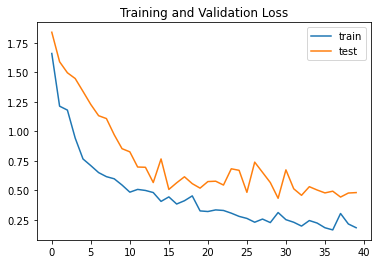

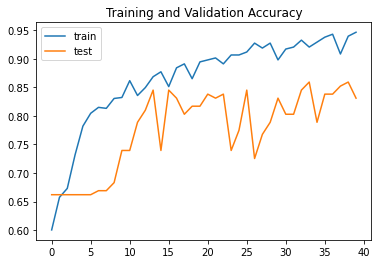

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='train')
plt.plot(val_loss, label='test')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(acc, label='train')
plt.plot(val_acc, label='test')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [16]:
print("Evaluate")

model.load_weights(checkpoint_file_path) #Load the best weights from the file
result = model.evaluate(test_ds)
dict(zip(model.metrics_names, result))

Evaluate
12/12 [==============================] - 1s 55ms/step - loss: 0.5314 - accuracy: 0.8791


{'loss': 0.5313550233840942, 'accuracy': 0.8791208863258362}

## Confusion Matrix and Classification

## Evaluate the Model

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
              precision    recall  f1-score   support

       angry       0.33      0.22      0.27         9
     disgust       0.92      1.00      0.96        12
        fear       1.00      0.20      0.33         5
       happy       0.78      1.00      0.88        14
     neutral       0.91      0.97      0.94       119
         sad       0.00      0.00      0.00         6
    surprise       1.00      0.88      0.94        17

    accuracy                           0.88       182
   macro avg       0.71      0.61      0.62       182
weighted avg       0.85      0.88      0.85       182



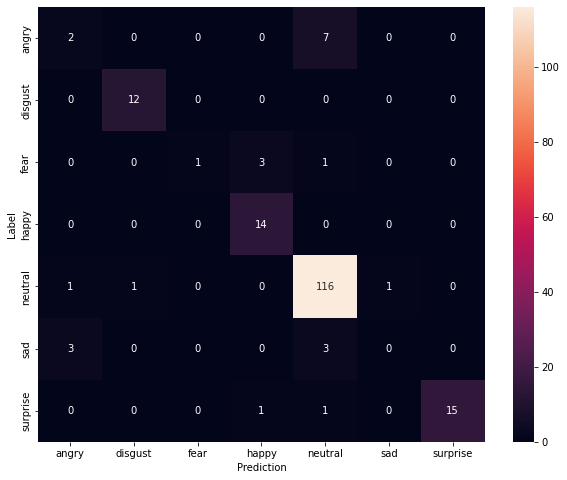

In [18]:
import seaborn as sns
from sklearn.metrics import classification_report

# defines which dataset we want to show the confusion matrix and classification report 
dataset = test_ds



# Get predictions from the model
predictions = model.predict(dataset)
predictions = np.argmax(predictions, axis=1)

class_labels = []
for c in dataset.class_indices:
    class_labels.append(c)

print(class_labels)

# create a confusion matrix
confusion_mtx = tf.math.confusion_matrix(dataset.classes, predictions , num_classes=7)

# Function that displays the confusion matrix
def show_confusion_matrix(cm, labels):
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, xticklabels=class_labels, yticklabels=class_labels, 
              annot=True, fmt='g')
  plt.xlabel('Prediction')
  plt.ylabel('Label')
  plt.show()


print(classification_report(dataset.classes, predictions, target_names=class_labels))
show_confusion_matrix(confusion_mtx, class_labels)
